In [1]:
from ipynb.fs.defs.functions import *

from datetime import datetime
import networkx as nx
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import sys
import contextlib
import itertools
from math import comb
from numpy import linalg as LA
import math
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
from math import factorial as f
import networkx as nx
import itertools
import time
import pandas as pd
import random as rnd

def theoretic_fixation_moran(nodes,fitness):
    if fitness==1:
        return 1/(nodes)
    else:
        k=(1-1/fitness)/(1-1/(pow(fitness,nodes)))
        return k
    
def theoretic_fixation_moran_dB(nodes,fitness):
    if fitness==1:
        return 1/(nodes)
    else:
        k=((nodes-1)/(nodes))*((1-1/fitness)/(1-1/(pow(fitness,nodes-1))))
        return k
    


In [2]:
graph_enum_6 = iso_graph(get_all_graphs(6))

In [ ]:
[matrix_solver(T_weightMat(random_graph_collection[index,weight_index],t/10))-theoretic_fixation_moran(10,t/10) for  t in range(1,20)]

In [6]:
def T_weightMat_dB(G,r):

    if type(G) == nx.classes.graph.Graph :
        n=nx.number_of_nodes(G)
        A=nx.adjacency_matrix(G)
        
        #T is the transition matrix
    elif type(G) == np.ndarray or type(G) == scipy.sparse.csr.csr_matrix or type(G) ==np.matrix :
        A=G
        n=np.shape(A)[0]
      
    
    T=np.zeros((2**(n),2**(n)),dtype='float')
    
    #one-one correspondence bit strings 
    #zero denotes resident in the corresponding vertex in the graph and one the mutant
    lst = list(itertools.product([0, 1], repeat=n))
    bit_strings = np.array(lst)
    
    
    #setting the entries of T, iteratively
    for i in range(2**(n)):
        #finding the entries of bit_strings which correspond to the states with exactly one mutant
        #k is the number of mutants in state i
        k= np.count_nonzero(bit_strings[i]!=0)
        
        for j in range(2**(n)):
            
            #Checking that the corresponding bit strings i and j only differ in one entry
            if LA.norm(bit_strings[i]-bit_strings[j])==1 :
                
                #Checking whether theres an increase or decrease in number of mutants 
                arr=bit_strings[j]-bit_strings[i]
                #new_arr_no_0 contains a single entry, either -1 or 1
                new_arr_no_0 = arr[arr!=0]
                #new_node is the difference node between i and j
                new_node= np.nonzero(arr)[0][0]
                
                #if i==1 and j==0:
                    #print("The sign is",np.sign(new_arr_no_0[0]))
                #s is an array that contains the non-zero indices (mutants)
                s= np.nonzero(bit_strings[i])[0]
                m=0
                for l in s:
                    m += A[l,new_node]
                    
                #if there is a gain in mutant number
                if np.sign(new_arr_no_0[0])==1:
                    T[i,j]=(1/n)*((r*m)/(r*m+G.degree(new_node,weight='weight')-m))
                
                #if there is a drop in mutant number    
                elif np.sign(new_arr_no_0[0])==-1:
                    T[i,j]=(1/n)*((G.degree(new_node,weight='weight')-m)/(r*m+G.degree(new_node,weight='weight')-m))
                        
                
            if LA.norm(bit_strings[i])==0 :
                T[i,i]=1
                T[i,j]=0
                    
       
    for i in range(1,2**(n)):
        T[i,i]= 1- np.sum(T,axis=1)[i]
        
    return T

In [32]:
T_WeightMat_dB(nx.complete_graph(3),1.2)[6]

array([0.        , 0.        , 0.15151515, 0.        , 0.15151515,
       0.        , 0.36363636, 0.33333333])

In [28]:
list(itertools.product([0, 1], repeat=3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [47]:
i=3
r=10

matrix_solver(T_WeightMat_dB(nx.complete_graph(i),r))-theoretic_fixation_moran_dB(i,r)

-1.1102230246251565e-16

In [23]:
matrix_solver(T_WeightMat_dB(nx.complete_graph(i),1.2))

0.25752608047690007

## need to check if classification of static amplifiers and suppressors is correct
## rinse and repeat as before

In [31]:
graph_enum_6 = iso_graph(get_all_graphs(6))

In [12]:
def T_WeightMat_dB(G,r):

    if type(G) == nx.classes.graph.Graph :
        n=nx.number_of_nodes(G)
        A=nx.adjacency_matrix(G)
        
        #T is the transition matrix
    elif type(G) == np.ndarray or type(G) == scipy.sparse.csr.csr_matrix or type(G) ==np.matrix :
        A=G
        n=np.shape(A)[0]
      
    
    T=np.zeros((2**(n),2**(n)),dtype='float')
    
    #one-one correspondence bit strings 
    #zero denotes resident in the corresponding vertex in the graph and one the mutant
    lst = list(itertools.product([0, 1], repeat=n))
    bit_strings = np.array(lst)
    
    
    #setting the entries of T, iteratively
    for i in range(2**(n)):
        #finding the entries of bit_strings which correspond to the states with exactly one mutant
        #k is the number of mutants in state i
        k= np.count_nonzero(bit_strings[i]!=0)
        
        for j in range(2**(n)):
            
            #Checking that the corresponding bit strings i and j only differ in one entry
            if LA.norm(bit_strings[i]-bit_strings[j])==1 :
                
                #Checking whether theres an increase or decrease in number of mutants 
                arr=bit_strings[j]-bit_strings[i]
                #new_arr_no_0 contains a single entry, either -1 or 1
                new_arr_no_0 = arr[arr!=0]
                #new_node is the difference node between i and j
                new_node= np.nonzero(arr)[0][0]
                
                #if i==1 and j==0:
                    #print("The sign is",np.sign(new_arr_no_0[0]))
                #s is an array that contains the non-zero indices (mutants)
                s= np.nonzero(bit_strings[i])[0]
                m=0
                for l in s:
                    m += A[l,new_node]
                    
                #if there is a gain in mutant number
                if np.sign(new_arr_no_0[0])==1:
                    T[i,j]=(1/n)*((r*m)/(r*m+G.degree(new_node,weight='weight')-m))
                
                #if there is a drop in mutant number    
                elif np.sign(new_arr_no_0[0])==-1:
                    T[i,j]=(1/n)*((G.degree(new_node,weight='weight')-m)/(r*m+G.degree(new_node,weight='weight')-m))
                        
                
            if LA.norm(bit_strings[i])==0 :
                T[i,i]=1
                T[i,j]=0
                    
       
    for i in range(1,2**(n)):
        T[i,i]= 1- np.sum(T,axis=1)[i]
        
    return T


In [18]:
n=4
k=5.2
matrix_solver(T_WeightMat_dB(nx.star_graph(n),k))-theoretic_fixation_moran_dB(5,k)

-0.23350003468461378

In [13]:
T_WeightMat_dB(nx.complete_graph(5),2)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.48      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.        , 0.48      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.68571429, 0.        ,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.68571429,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
start_time = datetime.now()

weighted_networks_db_6nodes = np.zeros((112, 100), dtype=object)
for i in range(112):
    for j in range(100):
        G=graph_enum_6[i]
        for u,v in G.edges():
            G[u][v]['weight']=rnd.random()
        weighted_networks_db_6nodes[i,j]=[matrix_solver(T_WeightMat_dB(G,k/10))-theoretic_fixation_moran_dB(6,k/10) for k in range(1,20)]
    np.save('weighted_networks_db_6nodes_2.npy' , weighted_networks_db_6nodes ) 
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))        

np.save('weighted_networks_db_6nodes_2.npy' , weighted_networks_db_6nodes )

In [65]:
rnd.random()



0.23704716410514337

In [19]:
##classifying 

classifier_100 = np.zeros((112, 100), dtype=object)

check=[]

for i in range(112):
    for j in range(100):
        for k in range(3,19):
            if k==9:
                continue
            check.append(np.sign(weighted_networks_db_6nodes[i][j][k]))
        if check==[1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]:
            #suppressor
            classifier_100[i,j]= "Suppressor"
        elif check==[-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1]:
            #amplifier
            classifier_100[i,j]= "Amplifier"
        elif check==[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]:
            #isothermal
            classifier_100[i,j]= "Isothermal"
        else:
            #neither
            classifier_100[i,j]= "Neither"
        check=[]
            
            
###list of suppressors and 'neither' networks
amp_100=0
sup_100=0
neither_100=0
iso_100=0

sup_list_100=[]
neither_list_100=[]
iso_list_100=[]

for i in range(112):
    for j in range(100):
        if classifier_100[i,j]== "Suppressor":
            sup_100+=1
            sup_list_100.append([i,j])
        elif classifier_100[i,j]== "Amplifier":
            amp_100+=1
        elif classifier_100[i,j]== "Isothermal":
            iso_100+=1
            iso_list_100.append([i,j])
        else:
            neither_100+=1
            neither_list_100.append([i,j])
            
            
print(amp_100, sup_100, neither_100,iso_100)

0 11125 75 0


In [20]:
neither_list_100

[[5, 22],
 [5, 29],
 [5, 41],
 [5, 44],
 [5, 58],
 [5, 88],
 [14, 98],
 [16, 4],
 [16, 32],
 [16, 61],
 [16, 65],
 [16, 68],
 [17, 5],
 [17, 28],
 [18, 4],
 [18, 13],
 [18, 21],
 [18, 28],
 [18, 44],
 [18, 49],
 [18, 53],
 [18, 65],
 [18, 78],
 [18, 86],
 [27, 13],
 [30, 72],
 [33, 37],
 [34, 70],
 [35, 9],
 [35, 40],
 [36, 40],
 [36, 63],
 [37, 7],
 [37, 12],
 [37, 29],
 [37, 30],
 [37, 61],
 [37, 67],
 [54, 91],
 [55, 68],
 [56, 12],
 [56, 18],
 [57, 6],
 [58, 2],
 [59, 16],
 [59, 61],
 [72, 70],
 [73, 85],
 [75, 96],
 [76, 77],
 [77, 30],
 [78, 11],
 [78, 24],
 [78, 69],
 [78, 93],
 [78, 99],
 [79, 7],
 [79, 41],
 [79, 54],
 [79, 95],
 [79, 98],
 [91, 99],
 [93, 51],
 [93, 59],
 [93, 84],
 [98, 15],
 [100, 93],
 [102, 8],
 [104, 95],
 [107, 2],
 [107, 32],
 [108, 74],
 [109, 82],
 [111, 37],
 [111, 65]]

## Analysis

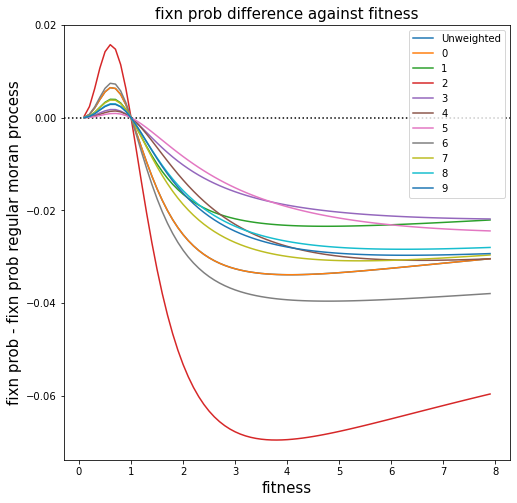

In [73]:
G=graph_enum_6[111]
for u,v in G.edges():
    G[u][v]['weight']=rnd.random()
    



plt.figure(figsize=(8, 8))
plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat_dB(G,i/10))-theoretic_fixation_moran_dB(6,i/10) for  i in range(1,80)],label="Unweighted")
plt.axhline(y=0, color='black', ls=':')
for(l) in range(10):
    plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat_dB(G,i/10))-theoretic_fixation_moran_dB(6,i/10) for  i in range(1,80)],label=l)
    for u,v in G.edges():
        G[u][v]['weight']=rnd.random()



plt.title('fixn prob difference against fitness',fontsize=15)
plt.xlabel('fitness',fontsize=15)
plt.ylabel('fixn prob - fixn prob regular moran process',fontsize=15)
plt.legend()
plt.show()


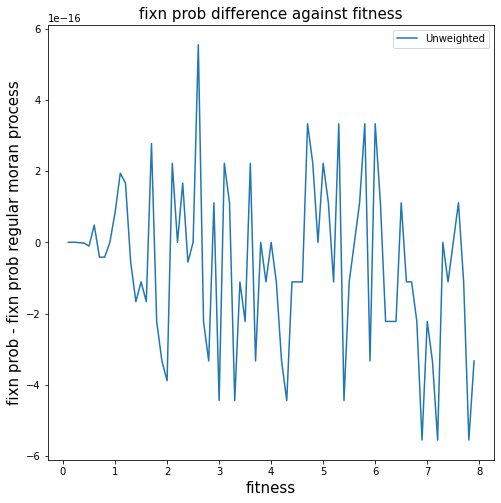

In [85]:
G=nx.complete_graph(6)

    



plt.figure(figsize=(8, 8))
plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat_dB(G,i/10))-theoretic_fixation_moran_dB(6,i/10) for  i in range(1,80)],label="Unweighted")


plt.title('fixn prob difference against fitness',fontsize=15)
plt.xlabel('fitness',fontsize=15)
plt.ylabel('fixn prob - fixn prob regular moran process',fontsize=15)
plt.legend()
plt.show()


## Scatterplot

In [3]:
weighted_networks_db_6nodes=np.load('weighted_networks_db_6nodes.npy', allow_pickle=True)

In [4]:
graph_6_nodes_db_unweighted_r_1_3=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],1.3))-theoretic_fixation_moran_dB(6,1.3) for i in range(112)]

In [5]:
graph_6_nodes_db_unweighted_r_0_9=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],0.9))-theoretic_fixation_moran_dB(6,0.9) for i in range(112)]

In [ ]:
weighted_networks_db_6nodes=np.load('weighted_networks_db_6nodes.npy', allow_pickle=True)
graph_6_nodes_db_unweighted_r_1_3=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],1.3))-theoretic_fixation_moran_dB(6,1.3) for i in range(112)]
graph_6_nodes_db_unweighted_r_0_9=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],0.9))-theoretic_fixation_moran_dB(6,0.9) for i in range(112)]

In [6]:
for j in range(112):
    for i in range(100):
        weighted_networks_db_6nodes[j][i][13]

-0.07410845250881934

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

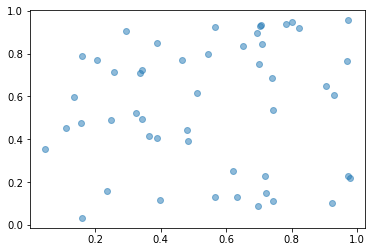

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()

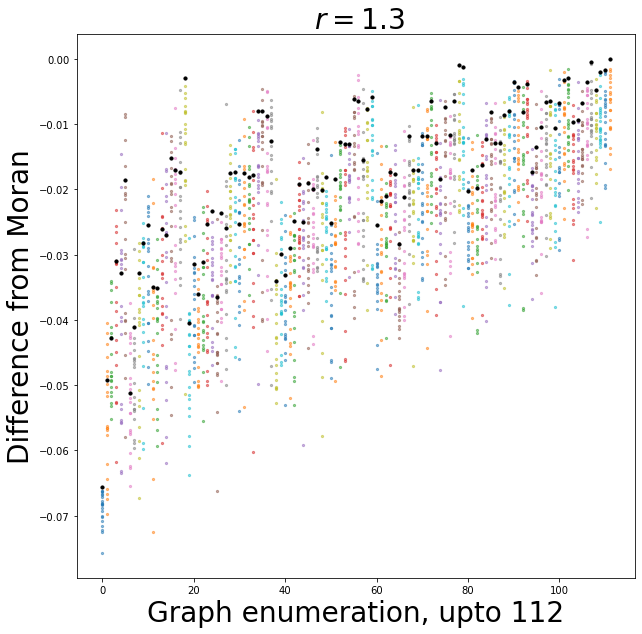

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
dim=20
radius=5
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[j][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(x, y,s=radius, alpha=0.5)
    plt.scatter(j,graph_6_nodes_db_unweighted_r_1_3[j],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
plt.xlabel('Graph enumeration, upto 112',fontsize=28)
plt.ylabel('Difference from Moran',fontsize=28)
plt.title(" $r=1.3$",fontsize=28)
plt.show()

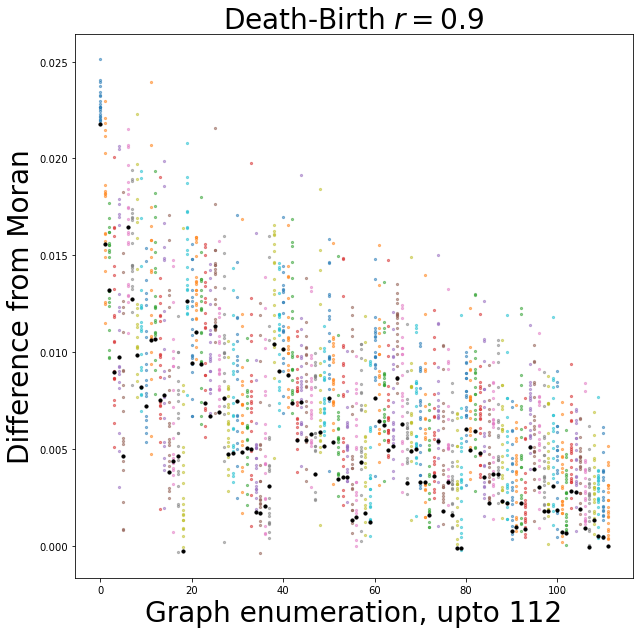

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
dim=20
radius=5
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[j][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(x, y,s=radius, alpha=0.5)
    plt.scatter(j,graph_6_nodes_db_unweighted_r_0_9[j],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
plt.xlabel('Graph enumeration, upto 112',fontsize=28)
plt.ylabel('Difference from Moran',fontsize=28)
plt.title("Death-Birth $r=0.9$",fontsize=28)
plt.show()

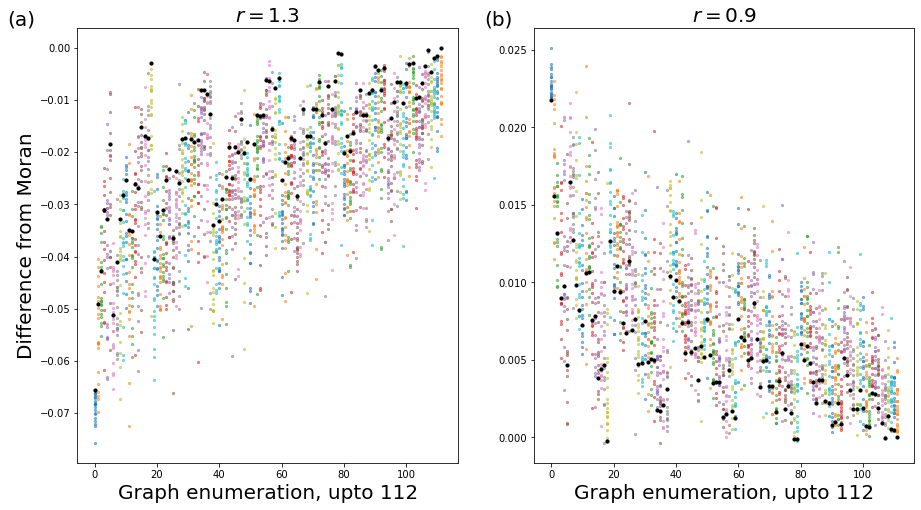

In [17]:
#plt.figure(figsize=(10, 10)) 
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[j][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j,graph_6_nodes_db_unweighted_r_1_3[j],s=2*radius,color='black')
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[j][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[1].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j,graph_6_nodes_db_unweighted_r_0_9[j],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
axs[0].set_xlabel('Graph enumeration, upto 112',fontsize=20)
axs[0].set_ylabel('Difference from Moran',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Graph enumeration, upto 112',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('db_scatterplot.pdf', bbox_inches="tight")
plt.show()

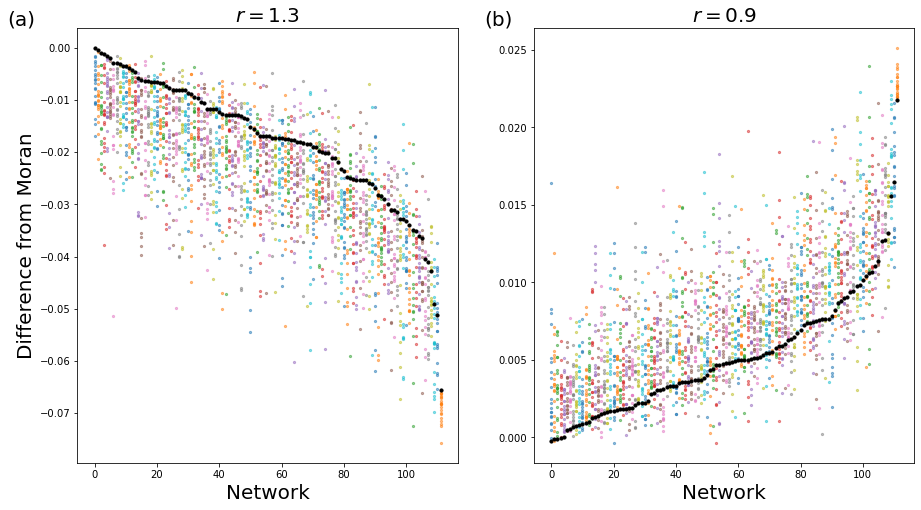

In [13]:
#plt.figure(figsize=(10, 10)) 
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
dim=20
radius=5
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
indices_sort_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_1_3)), key=lambda i: graph_6_nodes_db_unweighted_r_1_3[i], reverse=True)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j,graph_6_nodes_db_unweighted_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')
    
indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_0_9)), key=lambda i: graph_6_nodes_db_unweighted_r_0_9[i], reverse=False)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[1].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j,graph_6_nodes_db_unweighted_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
axs[0].set_xlabel('Network',fontsize=20)
axs[0].set_ylabel('Difference from Moran',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Network',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('db_scatterplot.pdf', bbox_inches="tight")
plt.show()

In [15]:
weighted_networks_10_r_0_9=graph_6_nodes_db_unweighted_r_0_9
weighted_networks_10_r_1_3=graph_6_nodes_db_unweighted_r_1_3
weighted_networks_100=weighted_networks_db_6nodes

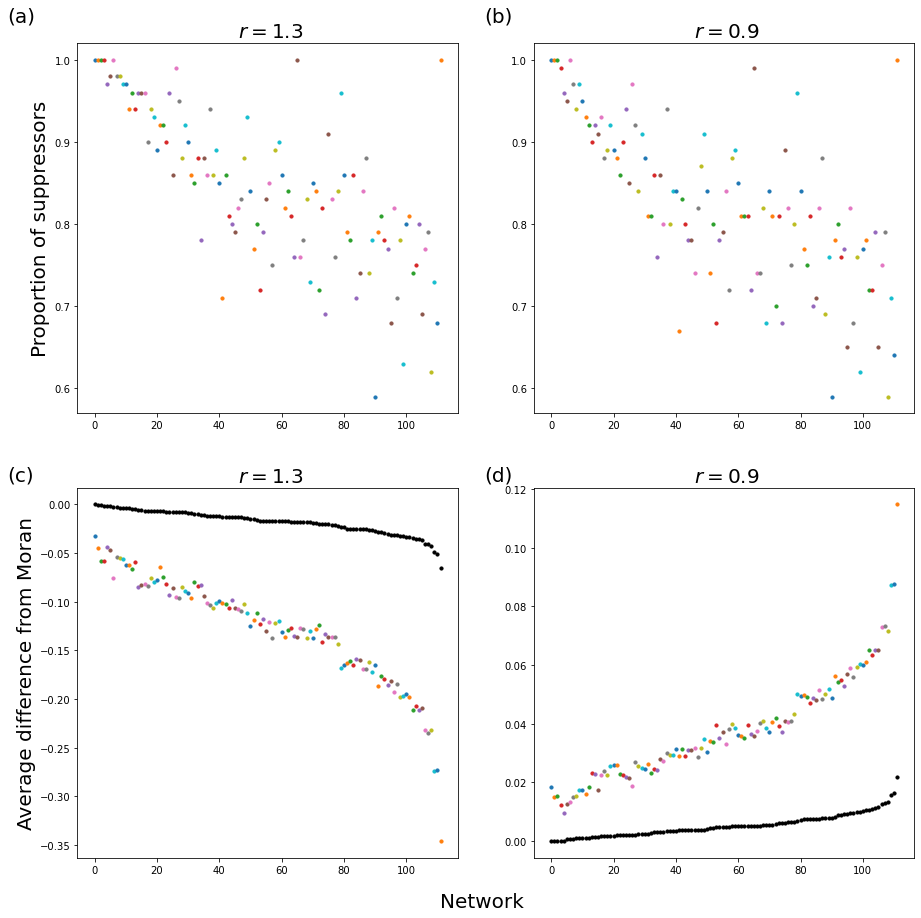

In [18]:
import matplotlib.pyplot as plt

# Assuming 'weighted_networks_100' and other data are defined somewhere in your code
# ...

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# First subplot (Top Left - (a))
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    axs[0, 0].scatter(j, sum(0.01 for num in [weighted_networks_100[indices_sort_by_value[j]][i][12]-weighted_networks_10_r_1_3[indices_sort_by_value[j]] for i in range(100)] if num < 0), s=2*radius)
#axs[0, 0].set_xlabel('Network', fontsize=20)
axs[0, 0].set_ylabel('Proportion of suppressors', fontsize=20)
axs[0, 0].set_title(" $r=1.3$", fontsize=20)

# Second subplot (Top Right - (b))
indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    axs[0, 1].scatter(j, sum(0.01 for num in [weighted_networks_100[indices_sort_by_value[j]][i][8]-weighted_networks_10_r_0_9[indices_sort_by_value[j]] for i in range(100)] if num > 0), s=2*radius)
#axs[0, 1].set_xlabel('Network', fontsize=20)
axs[0, 1].set_title(" $r=0.9$", fontsize=20)

# Third subplot (Bottom Left - (c))
for j in range(112):
    axs[1, 0].scatter(j, sum([weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(100)])/dim, s=2*radius)
#axs[1, 0].set_xlabel('Network', fontsize=20)
    axs[1,0].scatter(j,weighted_networks_10_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')
axs[1, 0].set_ylabel('Average difference from Moran', fontsize=20)
axs[1, 0].set_title(" $r=1.3$", fontsize=20)

# Fourth subplot (Bottom Right - (d))
for j in range(112):
    axs[1, 1].scatter(j, sum([weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(100)])/dim, s=2*radius)
#axs[1, 1].set_xlabel('Network', fontsize=20)
    axs[1,1].scatter(j,weighted_networks_10_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
axs[1, 1].set_title(" $r=0.9$", fontsize=20)

fig.text(0.06, 0.9, '(a)', fontsize=20)
fig.text(0.502, 0.9, '(b)', fontsize=20)
fig.text(0.06, 0.475, '(c)', fontsize=20)
fig.text(0.502, 0.475, '(d)', fontsize=20)
# Adjusting layout
#plt.tight_layout()
#fig.suptitle('Network', fontsize=20)
fig.text(0.5, 0.08, 'Network', ha='center', fontsize=20)
# Saving and showing the plot
plt.savefig('combined_avg_proportion_scatterplot_db.pdf', bbox_inches="tight")
plt.show()
